# Credit Card Approval Prediction

Credit score cards are a common risk control method in the financial industry.

It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 

The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given.

    1 Load credit card dataset
    2 Inspecting the dataset
    3 Handling the missing values
    4 Preprocessing the data
    5 Data Analysis Using Visualization
    6 Splitting the dataset into train and test sets
    7 Preprocessing the data
    8 Making predictions and evaluating performance
    9 Grid searching and making the model perform better
    10 Finding the best performing model

# Imports

In [340]:
# Importing Warnings Ignore
import warnings
warnings.filterwarnings('ignore')

# Importing File Operations
import numpy as np
import pandas as pd

# Importing Ploting 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

# Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Data Import

In [341]:
Left_Data = pd.read_csv('Credit_card.csv')
Left_Data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [342]:
Right_Data = pd.read_csv('Credit_card_label.csv')
Right_Data

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [343]:
df_raw = pd.merge(Left_Data, Right_Data, on='Ind_ID')
df_raw

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [344]:
df = df_raw.copy()
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


# Basic Data Exploration

## Feature Details

This dataset's objective is predicting whether an applicant's credit card approval will be approved or not. The dataset contains applicants' basic information

    Features name: (Credit_Card.csv)
    Ind_ID: Client ID
    Gender: Gender information
    Car_owner: Having car or not
    Propert_owner: Having property or not
    Children: Count of children
    Annual_income: Annual income
    Type_Income: Income type
    Education: Education level
    Marital_status: Marital_status
    Housing_type: Living style
    Birthday_count: Use backward count from current day (0), -1 means yesterday.
    Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
    Mobile_phone: Any mobile phone
    Work_phone: Any work phone
    Phone: Any phone number
    EMAIL_ID: Any email ID
    Type_Occupation: Occupation
    Family_Members: Family size
    Label: 0 is application approved and 1 is application rejected. 

## Describe

In [345]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,NaN,NaN,NaN,5078920.351421,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
GENDER,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Owner,1548,2,N,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Propert_Owner,1548,2,Y,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILDREN,1548.0,NaN,NaN,NaN,0.412791,0.776691,0.0,0.0,0.0,1.0,14.0
Annual_income,1525.0,NaN,NaN,NaN,191399.32623,113252.997656,33750.0,121500.0,166500.0,225000.0,1575000.0
Type_Income,1548,4,Working,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,1548,5,Secondary / secondary special,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1548,5,Married,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing_type,1548,6,House / apartment,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Info

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

## Unique Values & there Count

In [347]:
for i in df.columns:
    print(f'\n{i} : \n', df[i].unique(), '\n')
    print(df[i].value_counts())
    print('\n----------------------------------------------------------------------')


Ind_ID : 
 [5008827 5009744 5009746 ... 5115992 5118219 5053790] 

5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64

----------------------------------------------------------------------

GENDER : 
 ['M' 'F' nan] 

F    973
M    568
Name: GENDER, dtype: int64

----------------------------------------------------------------------

Car_Owner : 
 ['Y' 'N'] 

N    924
Y    624
Name: Car_Owner, dtype: int64

----------------------------------------------------------------------

Propert_Owner : 
 ['Y' 'N'] 

Y    1010
N     538
Name: Propert_Owner, dtype: int64

----------------------------------------------------------------------

CHILDREN : 
 [ 0  1  2  4  3 14] 

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

----------------------------------------------------------------------

Annual_income : 
 [ 180

## Null Value Count

In [348]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [349]:
df.isnull().mean()*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

## Observations

1. There are total 1548 rows × 19 columns
2. Columns Names are need to change for better understanding.
3. GENDER, Annual_income, Birthday_count, Type_Occupation Have Null Values
4. Type_Occupation Have more than 30% Null Value so it is good to drop that column
5. Employed_days & Birthday_count Have -ve values, as those are days so for better calculation we will convert in years
6. Mobile_phone have only one unique value so we will drop that column 


# Basic Cleanning

## Droping Unnecessary Columns

In [350]:
# As Mobile_phone have singel value & Type_Occupation have to much null value
# We will drop 'Mobile_phone' & 'Type_Occupation'
df1 = df.drop(['Mobile_phone', 'Type_Occupation'], axis=1)

## Droping Duplicate Rows

In [351]:
df1.drop_duplicates()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,0,0,0,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,0,2,0


## Converting Days to Years 

### Column Birthday_count 

In [352]:
# Column Birthday_count is in days so for better understanding we will convert it in to years as age
df1['Birthday_count'] = round(df1['Birthday_count']/-365,0)

### Column Employed_days

In [353]:
# As mentioned in document, if 'Employed_days' is positive, it means person currently unemployed.
# Hence Checking unique values greater than 0
df1[df1['Employed_days']>0]['Employed_days'].unique()

array([365243], dtype=int64)

In [354]:
# As from above 365243 is unique value which is greater than 0, hence replacing it with 0
df1['Employed_days'].replace(365243, 0, inplace=True)

In [355]:
# Converting 'Employed_days' values from Day to Years
df1['Employed_days'] = abs(round(df1['Employed_days']/-365,0))

## Renaming Column

In [356]:
# Making Copy Before proceding
df2 = df1.copy()

In [357]:
df2.rename(columns={'Ind_ID':'id', 'GENDER':'gender', 'Car_Owner':'car', 'Propert_Owner':'property', 'CHILDREN':'children',
                          'Annual_income':'income', 'Type_Income':'income_type', 'EDUCATION':'education', 'Marital_status':'marital_status',
                          'Housing_type':'housing_type', 'Birthday_count':'age', 'Employed_days':'employed_years', 
                          'Work_Phone':'work_phone', 'Phone':'phone', 'EMAIL_ID':'email',
                          'Family_Members':'family_members', 'label':'reject'}, 
                        inplace = True)

In [358]:
df2

,id,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,33.0,6.0,0,0,0,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


# Dealing With Missing Value 

## Null Count & Percentage

In [359]:
df2.isnull().sum()

id                 0
gender             7
car                0
property           0
children           0
income            23
income_type        0
education          0
marital_status     0
housing_type       0
age               22
employed_years     0
work_phone         0
phone              0
email              0
family_members     0
reject             0
dtype: int64

In [360]:
df2.isnull().mean()*100

id                0.000000
gender            0.452196
car               0.000000
property          0.000000
children          0.000000
income            1.485788
income_type       0.000000
education         0.000000
marital_status    0.000000
housing_type      0.000000
age               1.421189
employed_years    0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
family_members    0.000000
reject            0.000000
dtype: float64

## Missing Value Plot

<AxesSubplot: >

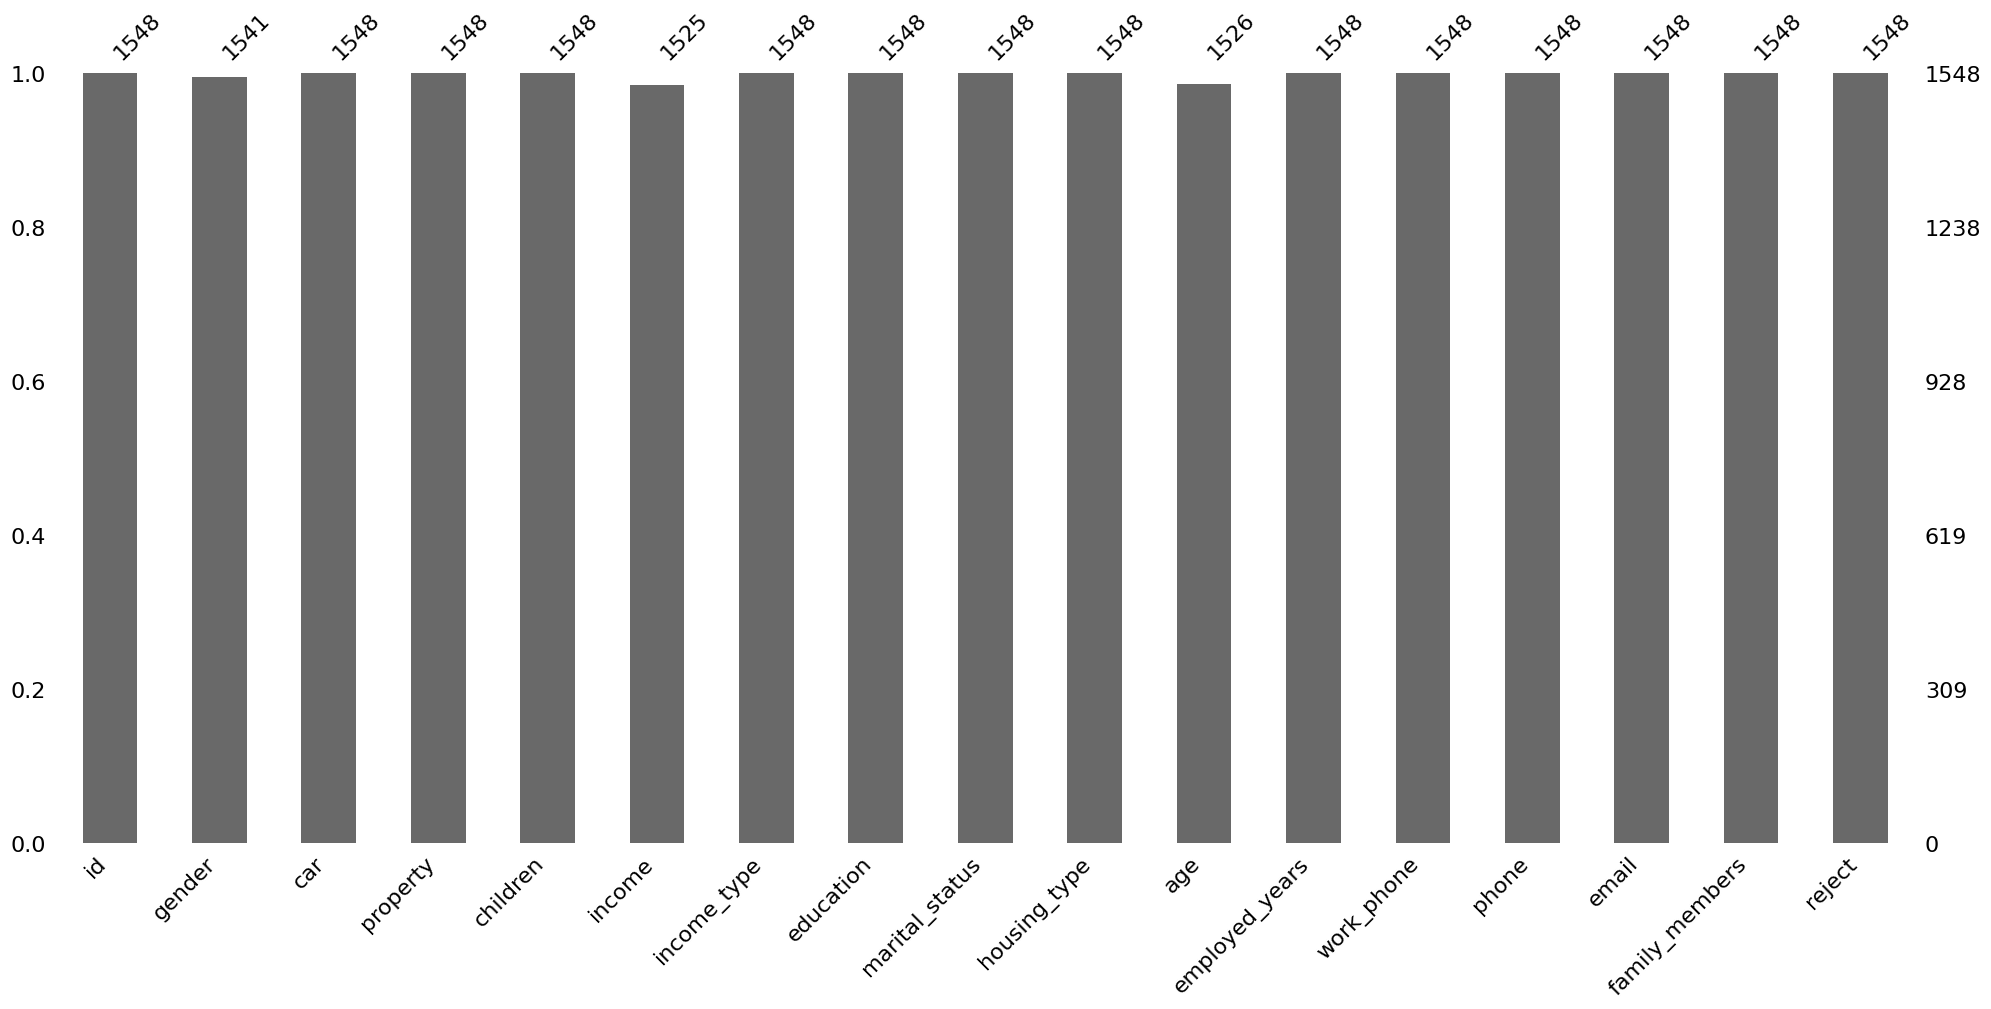

In [361]:
msno.bar(df2)

<AxesSubplot: >

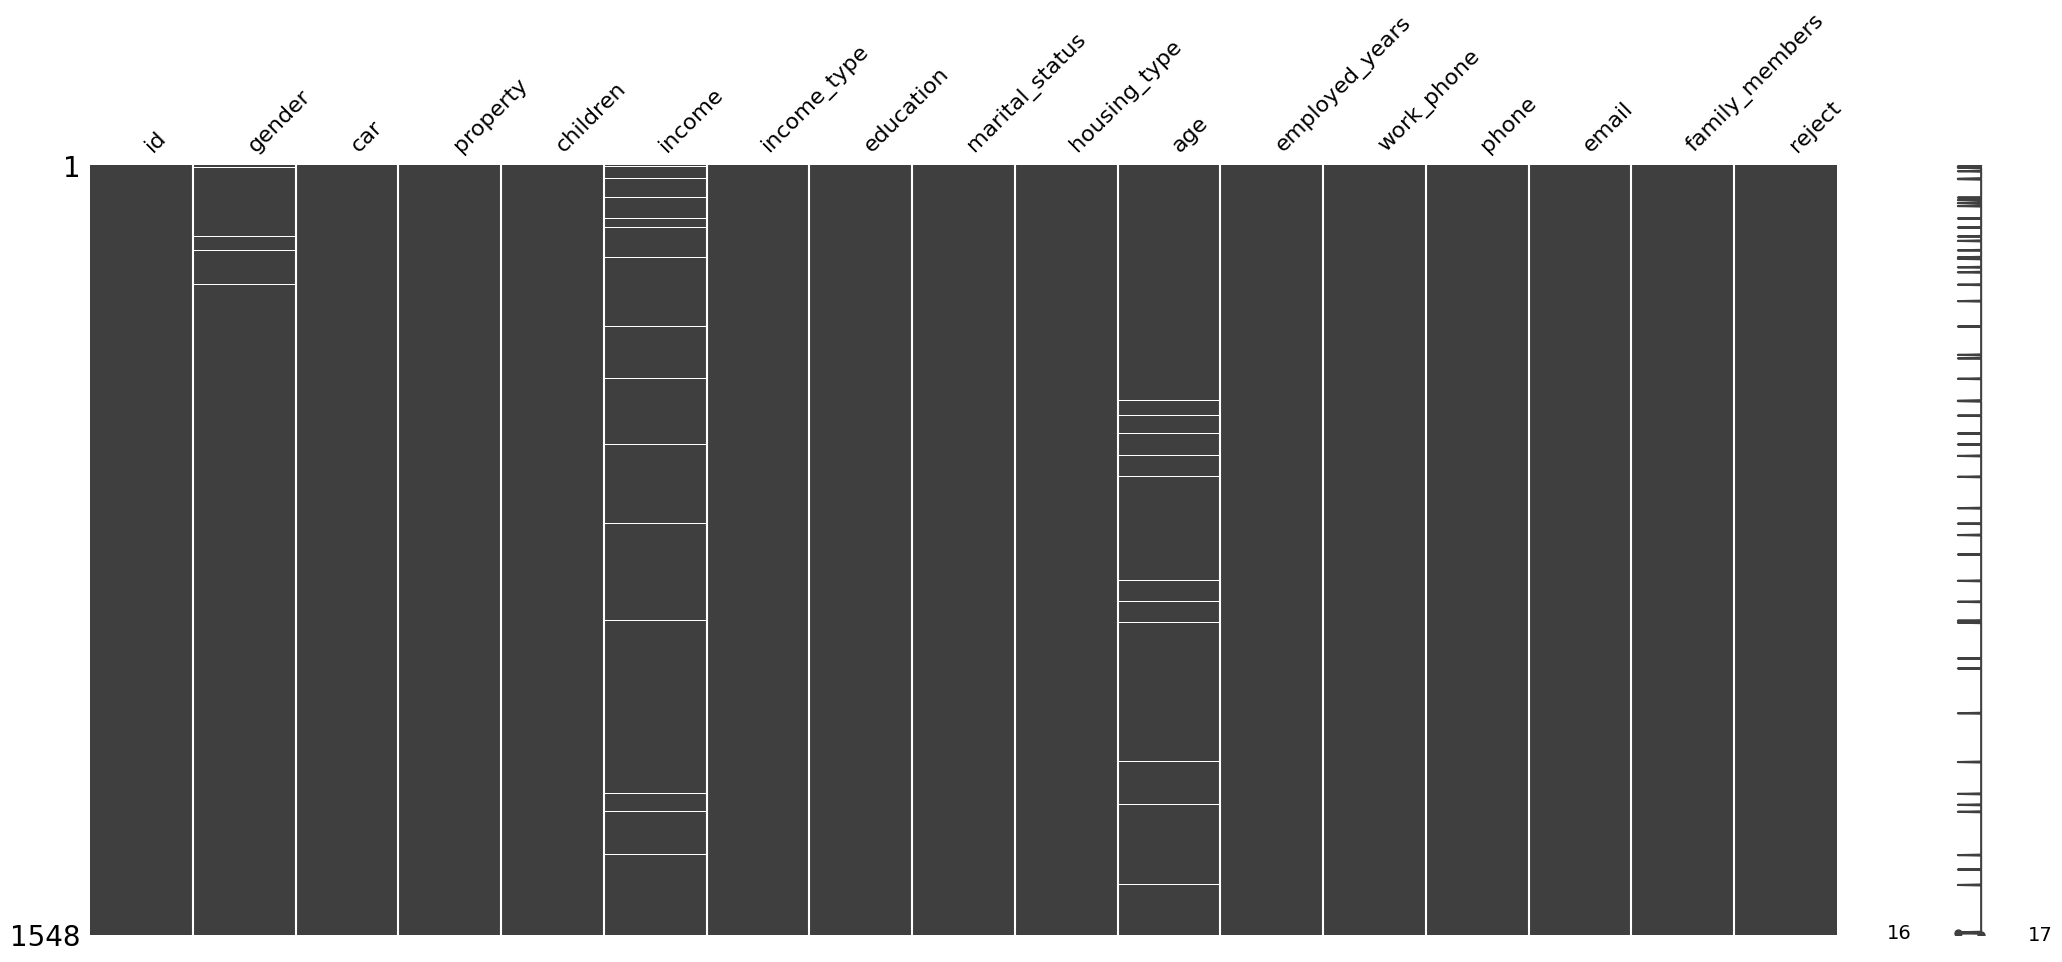

In [362]:
msno.matrix(df2)

## Droping of Null Value

In [363]:
df3 = df2.copy()

In [364]:
df3.isnull().sum().sum()

52

In [365]:
(df3.isnull().mean()*100).sum()

3.359173126614987

In [366]:
# As we see very few values are null i.e around 3% so we can delete it
df3 = df3.dropna()

In [367]:
df3

,id,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


# Dateset For SQL or PyMySQL

## Prepairing Dataset for SQL

In [368]:
df4 = df3.copy()

In [369]:
df4 = df4.reset_index()
df4 = df4.drop('index', axis=1)

In [370]:
df4     # This is final dataset for PyMySQL

,id,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1492,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1493,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,0,0,0,4,0
1494,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


In [371]:
#df4.to_csv('details.csv', index_label='index')

# Dealing With Outlier

## Droping id Column & Duplicates After Removal of id Column

In [372]:
df5 = df4.drop(['id'], axis=1)

In [373]:
df5 = df5.drop_duplicates()

In [374]:
df5

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
5,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
6,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,0,0,0,3,0
1491,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1492,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1494,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


## Analysing Outlier With Plots

### Boxplot to see outliers

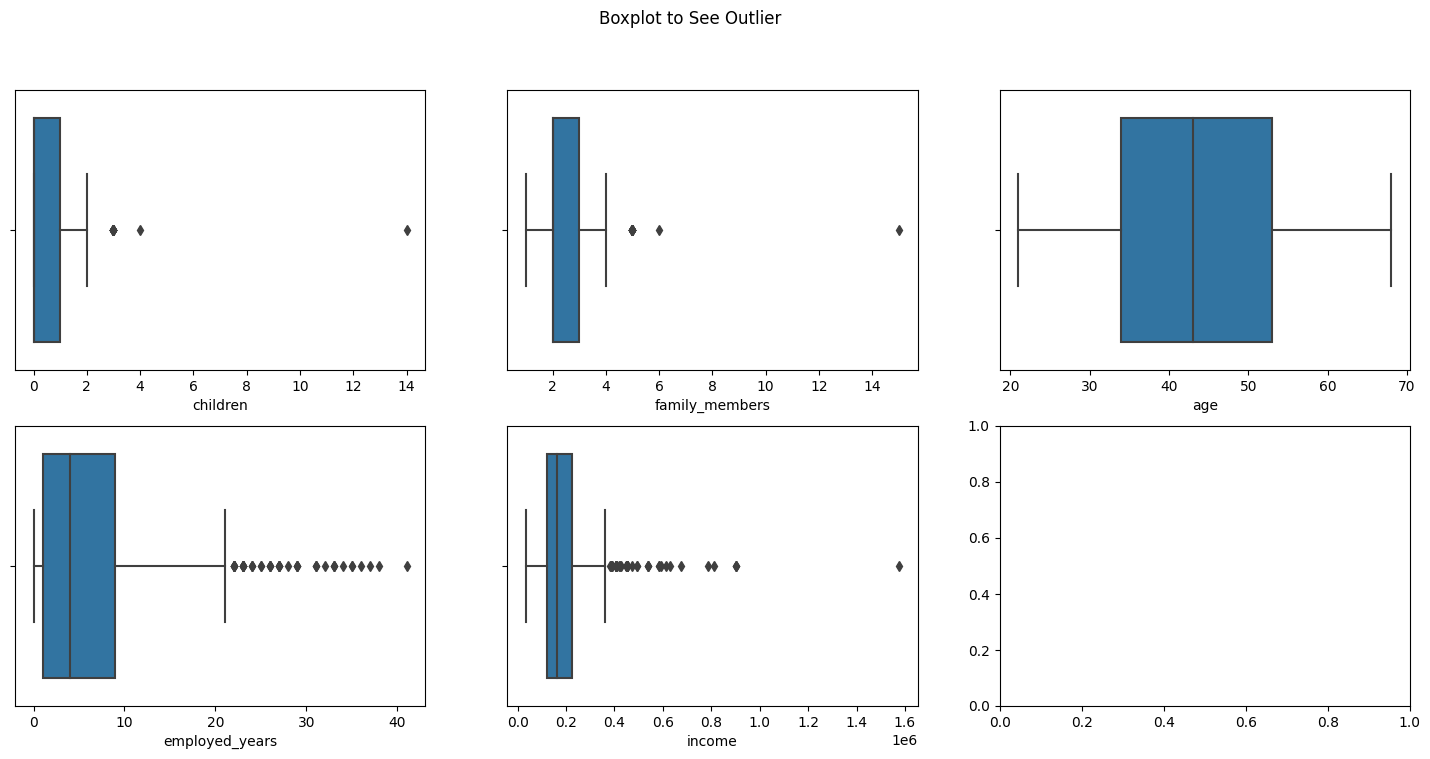

In [375]:
# Box Plot to see outlier
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
 
fig.suptitle('Boxplot to See Outlier')
 
sns.boxplot(ax=axes[0, 0], data=df5, x='children')
sns.boxplot(ax=axes[0, 1], data=df5, x='family_members')
sns.boxplot(ax=axes[0, 2], data=df5, x='age')
sns.boxplot(ax=axes[1, 0], data=df5, x='employed_years')
sns.boxplot(ax=axes[1, 1], data=df5, x='income')
plt.show()

### Histogram Plot 

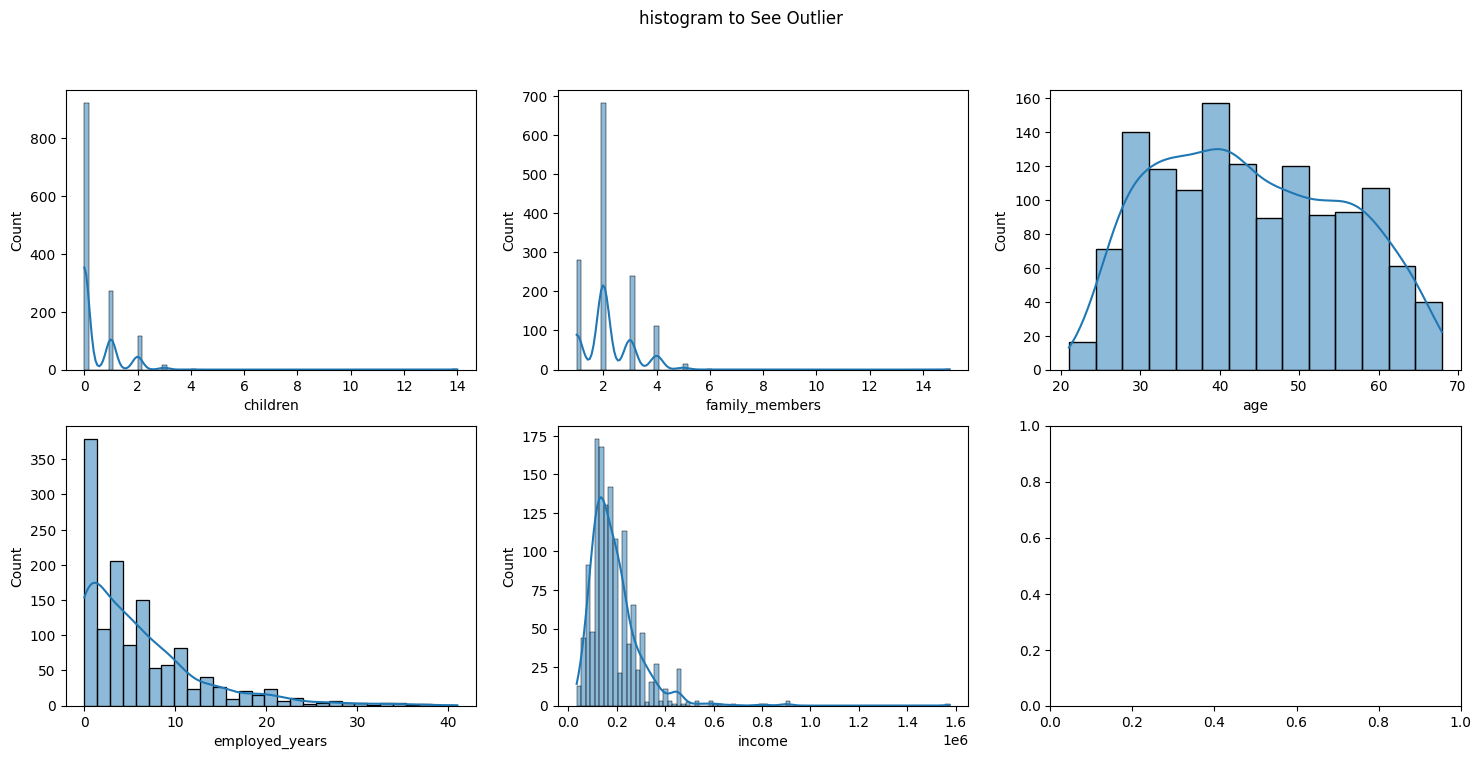

In [376]:
# Histogram Plot to see outlier

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
 
fig.suptitle('histogram to See Outlier')
 
sns.histplot(ax=axes[0, 0], data=df5, x='children', kde=True)
sns.histplot(ax=axes[0, 1], data=df5, x='family_members', kde=True)
sns.histplot(ax=axes[0, 2], data=df5, x='age', kde=True)
sns.histplot(ax=axes[1, 0], data=df5, x='employed_years', kde=True)
sns.histplot(ax=axes[1, 1], data=df5, x='income', kde=True)
plt.show()

## Observation

1. From Graphs it Observe that 'children', 'family_members', 'employed_years', 'income' have Oltliers

## Removing Children Outlier

In [377]:
high_children = round(df5['children'].quantile(0.999),0)
print('high_children :', high_children)
low_children = df5['children'].quantile(0.001)
print('low_children :', low_children)

high_children : 4.0
low_children : 0.0


In [378]:
df5 = df5[(df5['children']>=low_children) & (df5['children']<=high_children)]

## Removing Income Outlier

In [379]:
high_income = df5['income'].quantile(0.999)
print('high_income :', high_income)
low_income = df5['income'].quantile(0.001)
print('low_income :', low_income)

high_income : 900000.0
low_income : 36590.4


In [380]:
df5 = df5[(df5['income']>=low_income) & (df5['income']<=high_income)]

## Removing employed_years Outlier

In [381]:
high_years = round(df5['employed_years'].quantile(0.999),0)
print('high_years :', high_years)
low_years = df5['employed_years'].quantile(0.001)
print('low_years :', low_years)

high_years : 38.0
low_years : 0.0


In [382]:
df5 = df5[(df5['employed_years']>=low_years) & (df5['employed_years']<=high_years)]

In [383]:
df5

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
5,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
6,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,0,0,0,3,0
1491,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1492,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1494,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


# Final Dataset For DA & ML

In [384]:
final = df5.copy()

In [385]:
final

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
4,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
5,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
6,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,0,0,0,3,0
1491,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1492,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1494,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


# Data Analysis Using Visualization

## Basic Exploration

In [386]:
final = final.reset_index()
final = final.drop('index', axis=1)
final

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
2,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
3,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
4,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,0,0,0,3,0
1321,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1322,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1323,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


In [387]:
final.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1325,2,F,840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car,1325,2,N,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property,1325,2,Y,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,1325.0,NaN,NaN,NaN,0.418868,0.707389,0.0,0.0,0.0,1.0,4.0
income,1325.0,NaN,NaN,NaN,188080.658491,99753.895505,37800.0,121500.0,162000.0,225000.0,900000.0
income_type,1325,4,Working,678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1325,5,Secondary / secondary special,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,1325,5,Married,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_type,1325,6,House / apartment,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1325.0,NaN,NaN,NaN,43.863396,11.517171,21.0,34.0,43.0,53.0,68.0


In [388]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1325 non-null   object 
 1   car             1325 non-null   object 
 2   property        1325 non-null   object 
 3   children        1325 non-null   int64  
 4   income          1325 non-null   float64
 5   income_type     1325 non-null   object 
 6   education       1325 non-null   object 
 7   marital_status  1325 non-null   object 
 8   housing_type    1325 non-null   object 
 9   age             1325 non-null   float64
 10  employed_years  1325 non-null   float64
 11  work_phone      1325 non-null   int64  
 12  phone           1325 non-null   int64  
 13  email           1325 non-null   int64  
 14  family_members  1325 non-null   int64  
 15  reject          1325 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 165.8+ KB


## Co-Relation With reject

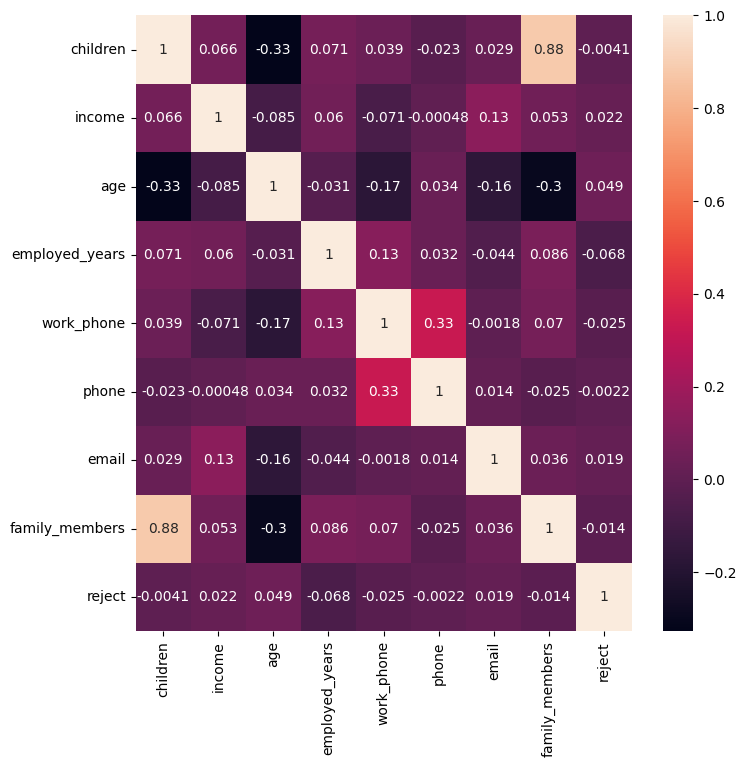

In [389]:
plt.figure(figsize = (8,8))
sns.heatmap(final.corr(), annot=True)
plt.show()

## Gender Wise Analysis

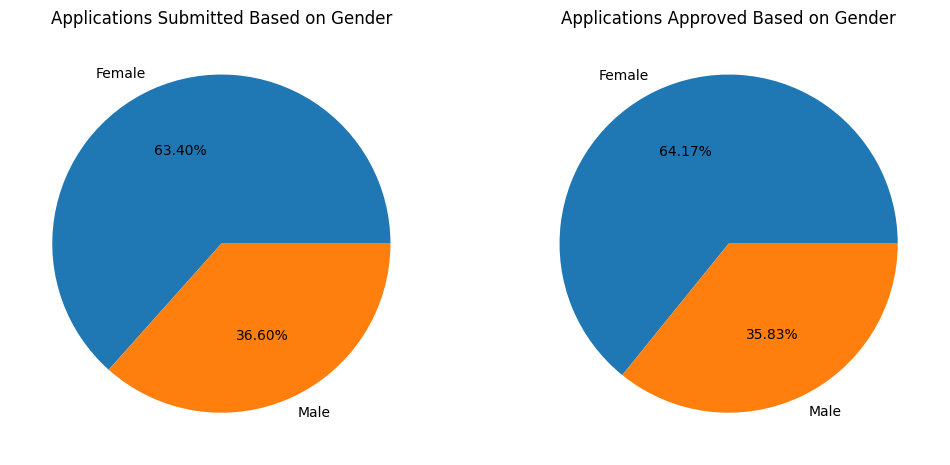

These plots shows that,

Majority of application are submitted by Female's  & 
Majority of application are approved for Female's



In [390]:
plt.figure(1, figsize=(12, 12)).add_subplot(121)
plt.pie(final['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('Applications Submitted Based on Gender')


plt.figure(1, figsize=(12, 12)).add_subplot(122)
plt.pie(final[final['reject']==0]['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('Applications Approved Based on Gender')


plt.show()

print('\033[1m' '\033[92m'
'These plots shows that,\n\n' '\033[0m''\033[95m'
'''Majority of application are submitted by Female's  & 
Majority of application are approved for Female's
''')

## Car & Property Analysis 

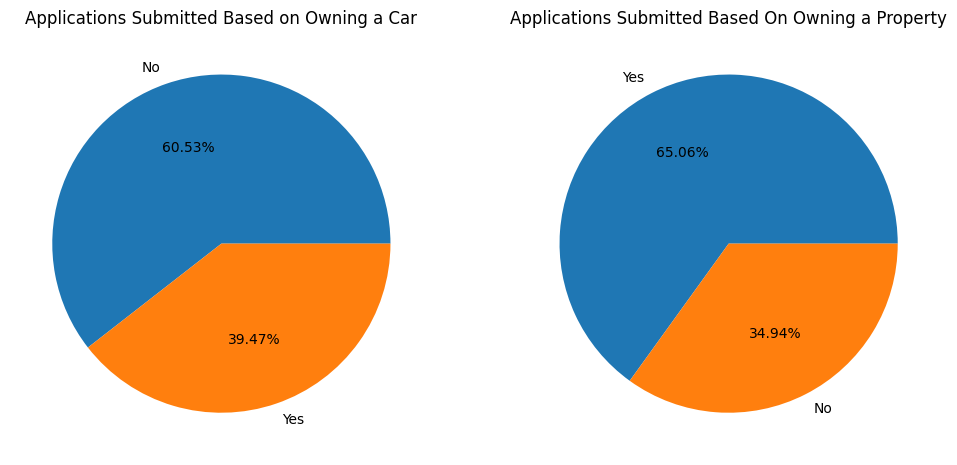

These plots shows that,

Majority of Applicatant's Don't Owns a Car  & 
Majority of Applicatant's Owns a Propety



In [391]:
plt.figure(1, figsize=(12, 12)).add_subplot(121)
plt.pie(final['car'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Applications Submitted Based on Owning a Car')


plt.figure(1, figsize=(12, 12)).add_subplot(122)
plt.pie(final['property'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('Applications Submitted Based On Owning a Property')


plt.show()

print('\033[1m' '\033[92m'
'These plots shows that,\n\n' '\033[0m''\033[95m'
'''Majority of Applicatant's Don't Owns a Car  & 
Majority of Applicatant's Owns a Propety
''')

## Children & Family Members

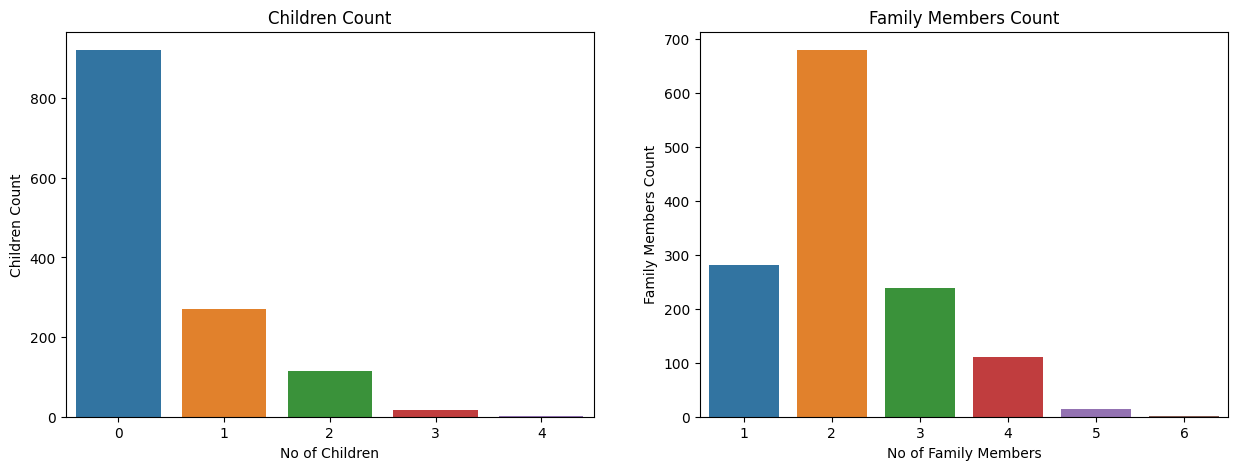

These plots shows that,

Majority of Applicatant's Don't Have any Children  & 
Majority of Applicatant's Family Size is 2



In [392]:
plt.figure(1, figsize=(15, 5)).add_subplot(121)
sns.barplot(final['children'].value_counts().index, final['children'].value_counts().values)
plt.xlabel('No of Children'); plt.ylabel('Children Count'); plt.title('Children Count')

plt.figure(1, figsize=(15, 5)).add_subplot(122)
sns.barplot(final['family_members'].value_counts().index, final['family_members'].value_counts().values)
plt.xlabel('No of Family Members'); plt.ylabel('Family Members Count'); plt.title('Family Members Count')

plt.show()

print('\033[1m' '\033[92m'
'These plots shows that,\n\n' '\033[0m''\033[95m'
'''Majority of Applicatant's Don't Have any Children  & 
Majority of Applicatant's Family Size is 2
''')

# Machine Learning

## Categorical Features Encoding

In [393]:
final_ml = final.copy()
final_ml

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,0,2,1
2,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,0.0,0,0,0,2,1
3,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
4,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35.0,8.0,0,0,0,3,0
1321,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,10.0,0,1,0,3,0
1322,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,0,0,0,1,0
1323,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,0,2,0


In [394]:
Categorical_Features = final_ml.columns[(final_ml.dtypes =='object').values].tolist()
Categorical_Features

['gender',
 'car',
 'property',
 'income_type',
 'education',
 'marital_status',
 'housing_type']

In [395]:
for i in Categorical_Features:
        globals()['LE_{}'.format(i)] = LabelEncoder()
        final_ml[i] = globals()['LE_{}'.format(i)].fit_transform(final_ml[i])
final_ml

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,work_phone,phone,email,family_members,reject
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,0,0,0,2,1
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,1,1,0,2,1
2,0,0,0,0,180000.0,1,4,1,1,61.0,0.0,0,0,0,2,1
3,1,1,1,1,450000.0,0,4,1,1,50.0,2.0,0,1,1,3,1
4,1,1,1,1,450000.0,1,4,1,1,50.0,2.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,1,1,1,144000.0,3,1,1,1,35.0,8.0,0,0,0,3,0
1321,1,1,0,1,360000.0,2,4,1,1,31.0,10.0,0,1,0,3,0
1322,0,0,0,0,225000.0,0,2,3,1,28.0,3.0,0,0,0,1,0
1323,1,1,0,0,270000.0,3,4,0,1,42.0,2.0,1,1,0,2,0


In [396]:
final_ml.drop(['work_phone', 'phone', 'email'], axis=1, inplace=True)

In [397]:
final_ml

,gender,car,property,children,income,income_type,education,marital_status,housing_type,age,employed_years,family_members,reject
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,2,1
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
2,0,0,0,0,180000.0,1,4,1,1,61.0,0.0,2,1
3,1,1,1,1,450000.0,0,4,1,1,50.0,2.0,3,1
4,1,1,1,1,450000.0,1,4,1,1,50.0,2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,1,1,1,144000.0,3,1,1,1,35.0,8.0,3,0
1321,1,1,0,1,360000.0,2,4,1,1,31.0,10.0,3,0
1322,0,0,0,0,225000.0,0,2,3,1,28.0,3.0,1,0
1323,1,1,0,0,270000.0,3,4,0,1,42.0,2.0,2,0


## Seprating Features & Target

In [398]:
features = final_ml.drop(['reject'], axis=1)
target = final_ml['reject']

## Train Test Split

In [399]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state = 10)                                                

## Model 1 - Random Forest Classification

In [400]:
RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  90.66265060240963 %

Confusion matrix :
[[301   0]
 [ 31   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       301
           1       0.00      0.00      0.00        31

    accuracy                           0.91       332
   macro avg       0.45      0.50      0.48       332
weighted avg       0.82      0.91      0.86       332



## Model 2 - XGBoost  Classification

In [401]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test, y_test)*100, '%')

prediction = XGB_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  88.25301204819277 %

Confusion matrix :
[[290  11]
 [ 28   3]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       301
           1       0.21      0.10      0.13        31

    accuracy                           0.88       332
   macro avg       0.56      0.53      0.54       332
weighted avg       0.85      0.88      0.86       332



## Model 3 - K Nearest Neighbor classification

In [402]:
knn_model = KNeighborsClassifier(n_neighbors = 9)

knn_model.fit(x_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  90.66265060240963 %

Confusion matrix :
[[301   0]
 [ 31   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       301
           1       0.00      0.00      0.00        31

    accuracy                           0.91       332
   macro avg       0.45      0.50      0.48       332
weighted avg       0.82      0.91      0.86       332



## Model 4 - Decision Tree classification

In [403]:
decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  85.54216867469879 %

Confusion matrix :
[[281  20]
 [ 28   3]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       301
           1       0.13      0.10      0.11        31

    accuracy                           0.86       332
   macro avg       0.52      0.52      0.52       332
weighted avg       0.84      0.86      0.85       332



## Balancing The Dataset

In [404]:
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [405]:
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [406]:
y_train.value_counts(normalize=True)*100

0    90.835851
1     9.164149
Name: reject, dtype: float64

In [407]:
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: reject, dtype: float64

## Balance Model 1 - Random Forest Classification

In [408]:
RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  78.40531561461795 %

Confusion matrix :
[[282  19]
 [111 190]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       301
           1       0.91      0.63      0.75       301

    accuracy                           0.78       602
   macro avg       0.81      0.78      0.78       602
weighted avg       0.81      0.78      0.78       602



## Balance Model 2 - XGBoost  classification

In [409]:
XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  83.72093023255815 %

Confusion matrix :
[[288  13]
 [ 85 216]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       301
           1       0.94      0.72      0.82       301

    accuracy                           0.84       602
   macro avg       0.86      0.84      0.83       602
weighted avg       0.86      0.84      0.83       602



## Balance Model 3 - K Nearest Neighbor classification

In [410]:
knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  57.475083056478404 %

Confusion matrix :
[[205  96]
 [160 141]]

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62       301
           1       0.59      0.47      0.52       301

    accuracy                           0.57       602
   macro avg       0.58      0.57      0.57       602
weighted avg       0.58      0.57      0.57       602



## Balance Model 4 - Decision Tree classification

In [411]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  77.90697674418605 %

Confusion matrix :
[[254  47]
 [ 86 215]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       301
           1       0.82      0.71      0.76       301

    accuracy                           0.78       602
   macro avg       0.78      0.78      0.78       602
weighted avg       0.78      0.78      0.78       602



# Final Conclusion

After Balancing XGBoost Model is Giving Highest Accuracy of 84.88 %, Hence We will Use XGBoost Model for Predicion